<a href="https://colab.research.google.com/github/CodingDuckmx/AmazonKindleReviews/blob/master/Notebooks/Kindle_Reviews_v_C_0_2_part0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Info about the data set.

columns:


    asin - ID of the product, e.g. 0000031852
    vote - helpful votes of the review



# Import libraries section.

In [0]:
import os
import gzip
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
import string
import seaborn as sns
import pickle



## Half fun half work
from IPython.display import Audio

# Area 501

In [0]:
#  !wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Kindle_Store_5.json.gz

In [7]:
# Decompress the file

data = []
with gzip.open('Kindle_Store_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

2222983
{'overall': 4.0, 'verified': True, 'reviewTime': '07 3, 2014', 'reviewerID': 'A2LSKD2H9U8N0J', 'asin': 'B000FA5KK0', 'style': {'Format:': ' Kindle Edition'}, 'reviewerName': 'sandra sue marsolek', 'reviewText': 'pretty good story, a little exaggerated, but I liked it pretty well.  liked the characters, the plot..it had mystery, action, love, all of the main things. I think most western lovers would injoy this book', 'summary': 'pretty good story', 'unixReviewTime': 1404345600}


In [8]:
### Convert the file into a DataFram

kr = pd.DataFrame.from_dict(data)

print(kr.shape)

kr.head()

(2222983, 12)


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,NaN
1,5.0,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,NaN
2,5.0,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,NaN
3,5.0,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,NaN
4,5.0,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2,NaN


The format in the Style and image column may difficult the identification of the type of the values, so I'll force to become strings.

In [0]:
kr['style'] = kr['style'].astype(str)
kr['image'] = kr['image'].astype(str)

Checking for type, null values and null values.

In [10]:
infodf = pd.concat([pd.DataFrame(kr.dtypes),pd.DataFrame(kr.isnull().sum()),pd.DataFrame(round((kr.isnull().sum() / len(kr)) * 100 , 2)), pd.DataFrame(kr.nunique()), pd.DataFrame(round(kr.nunique()/ len(kr) *100,2))], axis=1, join='inner')

infodf.columns = ['Type','Null values', '% of NaNs', 'Unique values', '% of unique values']
infodf = infodf.sort_values(by=['Type','Null values', 'Unique values'])

infodf.head(15)

,Type,Null values,% of NaNs,Unique values,% of unique values
verified,bool,0,0.00,2,0.00
unixReviewTime,int64,0,0.00,4838,0.22
overall,float64,0,0.00,5,0.00
style,object,0,0.00,27,0.00
image,object,0,0.00,1242,0.06
reviewTime,object,0,0.00,4838,0.22
asin,object,0,0.00,98824,4.45
reviewerID,object,0,0.00,139824,6.29
reviewerName,object,127,0.01,102643,4.62
reviewText,object,403,0.02,2114480,95.12


In [11]:
### Notice

unique_reviewsText = infodf.loc['reviewText','Unique values']

duplicate_reviewText = len(kr) - unique_reviewsText - 1

print(f'Notice: we have {len(kr)} rows in the dataframe but we olny have {unique_reviewsText} unique rows, so we have some identical rows we have to get rid of.')
print(f'So, we have {duplicate_reviewText} rows duplicated.')



Notice: we have 2222983 rows in the dataframe but we olny have 2114480 unique rows, so we have some identical rows we have to get rid of.
So, we have 108502 rows duplicated.


Checking for type, null values and null values, once again.

In [12]:
kr.drop_duplicates(subset='reviewText',keep='first', inplace=True)

infodf = pd.concat([pd.DataFrame(kr.dtypes),pd.DataFrame(kr.isnull().sum()),pd.DataFrame(round((kr.isnull().sum() / len(kr)) * 100 , 2)), pd.DataFrame(kr.nunique()), pd.DataFrame(round(kr.nunique()/ len(kr) *100,2))], axis=1, join='inner')

infodf.columns = ['Type','Null values', '% of NaNs', 'Unique values', '% of unique values']
infodf = infodf.sort_values(by=['Type','Null values', 'Unique values'])

infodf.head(15)

,Type,Null values,% of NaNs,Unique values,% of unique values
verified,bool,0,0.00,2,0.00
unixReviewTime,int64,0,0.00,4819,0.23
overall,float64,0,0.00,5,0.00
style,object,0,0.00,26,0.00
image,object,0,0.00,1209,0.06
reviewTime,object,0,0.00,4819,0.23
asin,object,0,0.00,98819,4.67
reviewerID,object,0,0.00,138996,6.57
reviewText,object,1,0.00,2114480,100.00
reviewerName,object,126,0.01,102003,4.82


In [13]:
unique_reviewsText = infodf.loc['reviewText','Unique values']

duplicate_reviewText = len(kr) - unique_reviewsText -1

print(f'Now we have {duplicate_reviewText} duplicated reviews.')


Now we have 0 duplicated reviews.


In [14]:
kr.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,{'Format:': ' Kindle Edition'},sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,nan
1,5.0,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,{'Format:': ' Kindle Edition'},Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,nan
2,5.0,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,{'Format:': ' Kindle Edition'},Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,nan
3,5.0,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,{'Format:': ' Kindle Edition'},Jeff,"As usual for him, a good book",a good,1456963200,NaN,nan
4,5.0,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,{'Format:': ' Kindle Edition'},DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2,nan


In [15]:
### What values are in the style column other than containing {'Format:': '

print(kr[~kr['style'].str.contains('Format')]['style'].value_counts(normalize=True))
print('\n We got some null values in the style column.')
print('\n')

### What values are in the image column other than containing an url

print(kr[~kr['image'].str.contains('image')]['image'].value_counts(normalize=True))
print('\n We got some null values in the image column.')
print('\n')

nan    1.0
Name: style, dtype: float64

 We got some null values in the style column.


nan    1.0
Name: image, dtype: float64

 We got some null values in the image column.




In [16]:
### Modify the style values dropping out the 'Format' part.

kr['style'] = kr['style'].replace({"{'Format:': ' Kindle Edition'}": 'Kindle Edition',
                                   "{'Format:': ' Hardcover'}" : 'Hardcover', 
                                   "{'Format:': ' Mass Market Paperback'}":' Mass Market Paperback' ,
                                   "{'Format:': ' Paperback'}":' Paperback' ,
                                   '{\'Format:\': \' 3.5" disk\'}':' 3.5" disk ', 
                                   "{'Format:': ' Audible Audiobook'}":' Audible Audiobook',
                                   "{'Format:': ' Audio CD'}":' Audio CD',
                                   "{'Format:': ' Audio Cassette'}":' Audio Cassette',
                                   "{'Format:': ' Library Binding'}":' Library Binding',
                                   "{'Format:': ' Kindle Edition with Audio/Video'}":' Kindle Edition with Audio/Video',
                                   "{'Format:': ' MP3 CD'}":' MP3 CD',
                                   "{'Format:': ' Leather Bound'}":' Leather Bound',
                                   "{'Format:': ' Print Magazine'}":' Print Magazine',
                                   "{'Format:': ' Perfect Paperback'}":' Perfect Paperback', 
                                   "{'Format:': ' School & Library Binding'}":' School & Library Binding',
                                   "{'Format:': ' Digital'}":' Digital',
                                   "{'Format:': ' Board book'}":' Board book',
                                   "{'Format:': ' Flexibound'}":' Flexibound',
                                   "{'Format:': ' Imitation Leather'}":' Imitation Leather',
                                   "{'Format:': ' Unknown Binding'}":' Unknown Binding', 
                                   "{'Format:': ' Prime Video'}":' Prime Video',
                                   "{'Format:': ' DVD'}":' DVD',
                                   "{'Format:': ' Preloaded Digital Audio Player'}":' Preloaded Digital Audio Player',
                                   "{'Format:': ' VHS Tape'}":' VHS Tape',
                                   "{'Format:': ' CD-ROM'}":' CD-ROM',
                                   "{'Format:': ' Comic'}":' Comic'  })

kr['style'].unique().tolist()


['Kindle Edition',
 'Hardcover',
 ' Mass Market Paperback',
 'nan',
 ' Paperback',
 ' 3.5" disk ',
 ' Audible Audiobook',
 ' Audio CD',
 ' Audio Cassette',
 ' Library Binding',
 ' Kindle Edition with Audio/Video',
 ' MP3 CD',
 ' Leather Bound',
 ' Print Magazine',
 ' Perfect Paperback',
 ' School & Library Binding',
 ' Digital',
 ' Board book',
 ' Flexibound',
 ' Imitation Leather',
 ' Prime Video',
 ' DVD',
 ' Preloaded Digital Audio Player',
 ' VHS Tape',
 ' CD-ROM',
 ' Comic']

In [17]:
### Notice: in the image column the null values are marked as 'nan'

print(f"Number of null values marked as 'nan' :{len(kr[(kr['image']== 'nan')])}")
print(f"Number of proper NaN's: {(kr['image'].isnull().sum())}")

### For the propourses of this analysis, I'm turning the values to True if there is an url and Fales if there's not.

kr['image'] = kr['image'].replace({'nan':False})


Number of null values marked as 'nan' :2113175
Number of proper NaN's: 0


In [18]:
### Turning the image column into a Boolean column: True if the review does have an url for the image, False otherwise.

kr['image'] = kr['image'].replace(to_replace=kr[~(kr['image'] == False)]['image'].tolist(),value=True)
print(kr['image'].describe())

kr.head()

count     2114481
unique          2
top         False
freq      2113175
Name: image, dtype: object


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4.0,True,"07 3, 2014",A2LSKD2H9U8N0J,B000FA5KK0,Kindle Edition,sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,False
1,5.0,True,"05 26, 2014",A2QP13XTJND1QS,B000FA5KK0,Kindle Edition,Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,False
2,5.0,True,"09 16, 2016",A8WQ7MAG3HFOZ,B000FA5KK0,Kindle Edition,Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,False
3,5.0,True,"03 3, 2016",A1E0MODSRYP7O,B000FA5KK0,Kindle Edition,Jeff,"As usual for him, a good book",a good,1456963200,NaN,False
4,5.0,True,"09 10, 2015",AYUTCGVSM1H7T,B000FA5KK0,Kindle Edition,DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2,False


In [19]:
### I'm suspicious reviewTime is the same as unixreviewtime, I'll verify this.

print(f"The number of rows with differences is {(pd.to_datetime(kr['reviewTime'],format='%m %d, %Y') != pd.to_datetime(kr['unixReviewTime'], unit='s')).sum()}, I'll consider then if drop one of these columns.")
print("For now, I'll split the reviewTime into day, month, year and day of the week.") #, as mark the season.")

kr['reviewTime'] = pd.to_datetime(kr['reviewTime'], format='%m %d, %Y')
kr['reviewyear'] = kr['reviewTime'].dt.year
kr['reviewmonth'] = kr['reviewTime'].dt.month
kr['reviewday'] = kr['reviewTime'].dt.day

kr['season'] = [''] * len(kr)

kr.loc[(kr['reviewmonth'] == 12) | (kr['reviewmonth'] == 1) | (kr['reviewmonth'] == 2),'season'] = 'winter'
kr.loc[(kr['reviewmonth'] == 3) | (kr['reviewmonth'] == 4) | (kr['reviewmonth'] == 5),'season'] = 'spring'
kr.loc[(kr['reviewmonth'] == 6) | (kr['reviewmonth'] == 7) | (kr['reviewmonth'] == 8),'season'] = 'summer'
kr.loc[(kr['reviewmonth'] == 9) | (kr['reviewmonth'] == 10) | (kr['reviewmonth'] == 11),'season'] = 'autumn'



kr.head()


The number of rows with differences is 0, I'll consider then if drop one of these columns.
For now, I'll split the reviewTime into day, month, year and day of the week.


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,reviewyear,reviewmonth,reviewday,season
0,4.0,True,2014-07-03,A2LSKD2H9U8N0J,B000FA5KK0,Kindle Edition,sandra sue marsolek,"pretty good story, a little exaggerated, but I...",pretty good story,1404345600,NaN,False,2014,7,3,summer
1,5.0,True,2014-05-26,A2QP13XTJND1QS,B000FA5KK0,Kindle Edition,Tpl,"If you've read other max brand westerns, you k...",A very good book,1401062400,NaN,False,2014,5,26,spring
2,5.0,True,2016-09-16,A8WQ7MAG3HFOZ,B000FA5KK0,Kindle Edition,Alverne F. Anderson,"Love Max, always a fun twist",Five Stars,1473984000,NaN,False,2016,9,16,autumn
3,5.0,True,2016-03-03,A1E0MODSRYP7O,B000FA5KK0,Kindle Edition,Jeff,"As usual for him, a good book",a good,1456963200,NaN,False,2016,3,3,spring
4,5.0,True,2015-09-10,AYUTCGVSM1H7T,B000FA5KK0,Kindle Edition,DEHS - EddyRapcon,MB is one of the original western writers and ...,A Western,1441843200,2,False,2015,9,10,autumn


In [0]:
# ## Is it real that the reviewerID are unique associated to the reviewerName?

# ###############################################################################
# ###############################################################################
# ###############################################################################

# # Do not run unless feeling with time to spare. I have run it once and verify that:

# #         -----> The reviewerID is _____ towards the reviewerName. <-----

# ###############################################################################
# ###############################################################################
# ###############################################################################

# for i in kr['reviewerID']:
#   if kr.loc[kr['reviewerID'] == i,'reviewerName'].nunique() >1:
#     print(i)



###Store the hole dataframe into  a pickle

In [0]:
# kr.to_pickle('kr.pkl')
# files.download('kr.pkl')

# reviews_all = kr[['overall','reviewText','summary']]


### How the the grade of the product are distributed?


5.0    0.605339
4.0    0.252951
3.0    0.089302
2.0    0.030742
1.0    0.021665
Name: overall, dtype: float64
The grades are skewed to five.


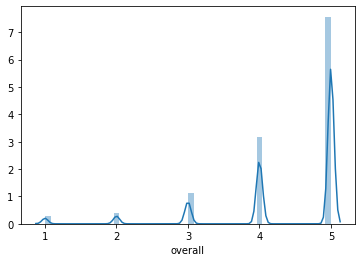

In [20]:
print(kr['overall'].value_counts(normalize=True))
print('The grades are skewed to five.')
sns.distplot(kr.overall);


### Next I want to see what are the most common words used in the reviews texts.


## I'll need to divide the reviews by rate (overall) to look in detail.

In [21]:
reviews_5 = kr[kr['overall']==5.0]
reviews_4 = kr[kr['overall']==4.0]
reviews_3 = kr[kr['overall']==3.0]
reviews_2 = kr[kr['overall']==2.0]
reviews_1 = kr[kr['overall']==1.0]

print('The original lenghts of the sub datasets.')
print(f'There are {len(reviews_5)} reviews with score 5. \n')
print(f'There are {len(reviews_4)} reviews with score 4. \n')
print(f'There are {len(reviews_3)} reviews with score 3. \n')
print(f'There are {len(reviews_2)} reviews with score 2. \n')
print(f'There are {len(reviews_1)} reviews with score 1. \n')



The original lenghts of the sub datasets.
There are 1279978 reviews with score 5. 

There are 534861 reviews with score 4. 

There are 188827 reviews with score 3. 

There are 65004 reviews with score 2. 

There are 45811 reviews with score 1. 



# Sampling. Due the size of my dataset, I'm going to take a sample of 10%.

In [22]:
reviews_1 = reviews_1.sample(int(round(len(reviews_1)/10,2)))
reviews_2 = reviews_2.sample(int(round(len(reviews_2)/10,2)))
reviews_3 = reviews_3.sample(int(round(len(reviews_3)/10,2)))
reviews_4 = reviews_4.sample(int(round(len(reviews_4)/10,2)))
reviews_5 = reviews_5.sample(int(round(len(reviews_5)/10,2)))

print('The sample lenghts of the sub datasets.')
print(f'There are {len(reviews_5)} reviews with score 5. \n')
print(f'There are {len(reviews_4)} reviews with score 4. \n')
print(f'There are {len(reviews_3)} reviews with score 3. \n')
print(f'There are {len(reviews_2)} reviews with score 2. \n')
print(f'There are {len(reviews_1)} reviews with score 1. \n')

The sample lenghts of the sub datasets.
There are 127997 reviews with score 5. 

There are 53486 reviews with score 4. 

There are 18882 reviews with score 3. 

There are 6500 reviews with score 2. 

There are 4581 reviews with score 1. 



#Export my samples.

In [0]:
reviews_1.to_pickle('reviews_1_sample.pkl')
reviews_2.to_pickle('reviews_2_sample.pkl')
reviews_3.to_pickle('reviews_3_sample.pkl')
reviews_4.to_pickle('reviews_4_sample.pkl')
reviews_5.to_pickle('reviews_5_sample.pkl')

In [0]:
######### ######## ######## ######## ######## ####### End of this notebook ###### ######## ######## ######## ######## ######## 

# Draft